## Initialize Session

This section calls the MajoranaSimulation class and loads your IBM Quantum account information.
To run an experiment on the backend or noisy simulation, please replace the placeholders for `api key`, `hub`, `group`, `project` with your information.

In [1]:
from MajoranaSimulation import MajoranaSimulation

#please enter your IBMQ account information below
api_key = 'your_api_key'
hub = 'your_hub' #e.g. 'ibm-q-internal'
group = 'your_group' #e.g. 'deployed'
project = 'your_project' #e.g. 'default'

msim = MajoranaSimulation(api_key,hub,group,project)

In [ ]:
msim.load_account()

## Run Simulation

This section runs a simulation based on parameters you set. Some important parameters include:

**Physical Parameters**
* `experiment` (str; the experiment you want to run: `'wavefunction'`, `'braiding'`, or `'two_point_correlation'`)
* `n_qubits` (int; number of qubits)
* `n_cycles` (int; maximum number of times the Floquet unitary is applied. Equal to `D-1` in the paper)
* `theta` (float; RXX gate angle $\theta$)
* `phi` (float; RZ gate angle $\phi$)
* `eta` (float; RZZ gate angle $\varphi$, used to introduce interactions)
  
**Hardware Parameters**
* `n_shots` (number of times each circuit is run on the simulator. Default is 8192)
* `layout` (list; the indices of the actual qubits you want to map your virtual qubits to, if doing a noisy simulation)
* `noise_type` (str or None; options are `None` (for noiseless sim) and `'backend_model'` (for noisy sim))
* `backend_to_simulate` (str; the name of the backend whose noise model you want to simulate, ONLY if doing a noiseless simulation)

In [3]:
# run a simulation
msim.backend = 'qasm_simulator'

# specify the type of experiment: 'wavefunction', 'braiding', or 'two_point_correlation'
msim.experiment = 'wavefunction'

# Option 1: for a noiseless simulation
msim.noise_type = None

# Option 2: for a noisy simulation
# msim.noise_type = 'backend_model'
# msim.backend_to_simulate = 'ibmq_montreal'

# set experiment parameters
msim.n_qubits = 6
msim.n_cycles = 3

# run simulation
msim.execute()

# print results
msim.results

{'x_axis': range(0, 6),
 'theory for left ZX': array([0.84104636, 0.34834246, 0.14418975, 0.05947733, 0.02403326,
        0.00849726]),
 'theory for left ZY': array([0.34834246, 0.14418975, 0.05947733, 0.02403326, 0.00849726,
        0.        ]),
 'theory for right ZX': array([0.00849726, 0.02403326, 0.05947733, 0.14418975, 0.34834246,
        0.84104636]),
 'theory for right ZY': array([0.        , 0.00849726, 0.02403326, 0.05947733, 0.14418975,
        0.34834246]),
 'experiment for left ZX': array([0.855866  , 0.35024321, 0.24109402, 0.11688976, 0.00674637,
        0.00134927]),
 'experiment for left ZY': array([0.25132009, 0.09814195, 0.01370579, 0.00106522, 0.00184638,
        0.00042609]),
 'experiment for right ZX': array([0.00177804, 0.00561862, 0.09900149, 0.25105981, 0.35461309,
        0.85011838]),
 'experiment for right ZY': array([0.00440955, 0.00597423, 0.00746778, 0.00974368, 0.11073658,
        0.25731852])}

## Run Experiment on Quantum Device

This section runs an experiment based on parameters you set. Some important parameters include:

**Physical Parameters**
* `experiment` (str; the experiment you want to run: 'wavefunction', 'braiding', or 'two_point_correlation')
* `n_qubits` (int; number of qubits)
* `n_cycles` (int; maximum number of times the Floquet unitary $U_F$ is applied. Equal to `D-1` in the paper)
* `theta` (float; $RXX(\theta)$ gate angle)
* `phi` (float; $RZ(\phi)$ gate angle)
* `eta` (float; $RZZ(\varphi)$ gate angle, used to introduce interactions)
  
**Hardware Parameters**
* `n_shots` (number of times each circuit is run on the backend. Default is 8192)
* `layout` (list; the indices of the actual qubits you want to map your virtual qubits to)
* `backend` (str; the name of the backend you want to use)

In [ ]:
# run an experiment on a quantum device
msim.backend = 'ibmq_lagos'

# first, specify the experiment: 'wavefunction', 'braiding', or 'two_point_correlation'
msim.experiment = 'two_point_correlation'

# set experiment parameters
msim.n_qubits = 6
msim.n_cycles = 3
msim.n_runs = 1 # ONLY FOR TWO-POINT-CORRELATION and BRAIDING
msim.layout = [0,1,2,3]

# run experiment
msim.execute()

# print results
msim.results

## Save Data

This section saves simulation/experimental data generated above to the directory `./Data/your_folder_name`. 

In [6]:
# specify destination file
directory = './Data/your_folder_name'

# save data
msim.save_data(directory)

Wavefunction data saved successfully to ./Data/your_folder_name


## Load Data

This section loads previously stored data from a specified folder. You have the following options:
1. `./Data/your_folder_name`: loads the simulation/experimental data generated above
2. `./paper_data/insert_experiment_name/figxx`: loads existing data for Fig. xx

In [2]:
# specify load directory
directory = './paper_data/Fourier component/fig_1c'

# load data
msim.load_data(directory)

#print experimental parameters
msim.params

fourier data loaded successfully from ./paper_data/Fourier component/fig_1c


{'type': 'right ZX',
 'num qubits': 21,
 'num gate cycles': 21,
 'num avgs': 4096,
 'device': 'ibmq_hanoi',
 'theta': 0.125,
 'eta': 0,
 'experiment': 'fourier'}

## Plot Data

<Figure size 640x480 with 0 Axes>

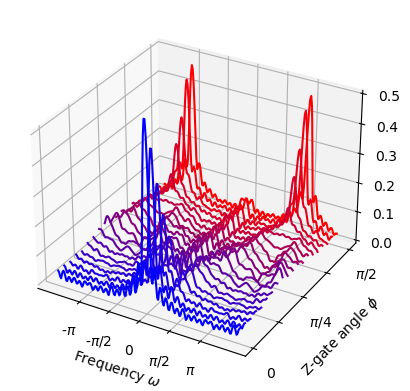

In [3]:
msim.plot_data()